<a href="https://colab.research.google.com/github/simulate111/Textual-Data-Analysis-25/blob/main/Exercise%20task%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import requests
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#Download and save data
def download_text(url, filename):
    response = requests.get(url)
    response.raise_for_status()
    with open(filename, "w", encoding="utf-8") as f:
        f.write(response.text)

english_url = "https://www.gutenberg.org/ebooks/7104.txt.utf-8"
finnish_url = "https://www.gutenberg.org/ebooks/47095.txt.utf-8"

download_text(english_url, "english_text.txt")
download_text(finnish_url, "finnish_text.txt")

In [4]:
#Read data
with open("english_text.txt", "r", encoding="utf-8") as f:
    english_text = f.read()

with open("finnish_text.txt", "r", encoding="utf-8") as f:
    finnish_text = f.read()

In [5]:
#Text splitting
def split_text(text, window_size=2000, stride=500):
    return [text[i:i+window_size] for i in range(0, len(text) - window_size + 1, stride)]

english_split = split_text(english_text)
finnish_split = split_text(finnish_text)

In [6]:
#Model
model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.78k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [7]:
#Embeddings
english_embed = model.encode(english_split)
finnish_eembed = model.encode(finnish_split)

In [14]:
#Similarity calculation
similarity_matrix = cosine_similarity(finnish_embed, english_embed)

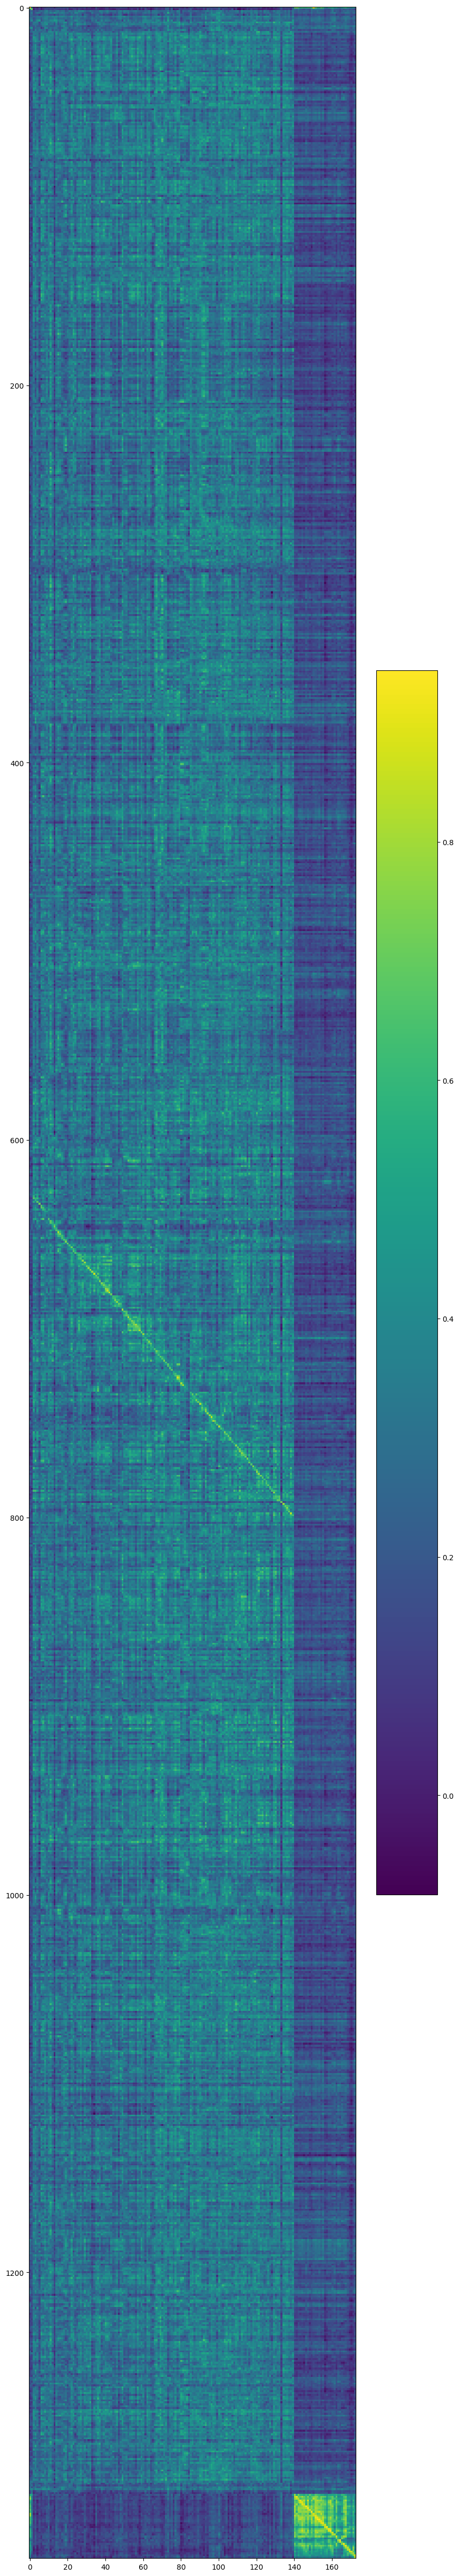

In [27]:
#Plot
plt.figure(figsize=(10, 88))
plt.imshow(similarity_matrix)
plt.colorbar()
plt.show()